# Regression Analysis

- so far, we've learned the main concepts behind supervised learning and trained many models for classification tasks to predict group memberships or categorial variables
- regression models are used to predict target variable on a continous scale
- some important applications are:
    1. predicting insurance premium
    2. making weather forecast
    3. predicting stock market
    4. predicting housing market
    5. predicting sales of a company in future month, etc.

- In this notebook, we will discuss the main concepts of regression models and cover the following topics:
    - Exploring and visualizing datasets
    - Looking at different approaches to implement linear regression models
    - Training regression models that are robust to outliers
    - Evaluating regression models and diagnosing common problems
    - Fitting regression models to nonlinear data
    
## Linear regression
- the goal of linear regression is to model the relationship between one or multiple features and a continuous target variable

### Simple linear regression
- the goal of simple (**univariate**) linear regression is to model the relationship between a single feature (**explanatory variable**, *x*) and a continuous-valued **target (response variable**, *y*) 
- the equation of a linear model with one explanatory variable is defined as follows:
    - $y = w_0 + w_1x$
        - $w_0$ is the $y$ axis incercept
        - $w_1$ is the weight coefficient independent variable
- the goal is to learn the weights of the linear equation to describe the relationship between the independent variable and the target variable
- the learned weights can be used predict responses of new samples
- visusally, linear regression can be understood as finding the best-fitting straight line through the training example, as shown in the following figure
![Linear Regression](./images/linear-reg-1.png)
- the best-fitting line is also called the regression line
- the vertical lines from the regression line to the training examples are the **offsets** or **residual** -- the errors of our prediction

### Multiple linear regression
- generalizing the linear regression model to multiple explanatory variables

    - $y = w_0 x_0 + w_1 x_1 + w_nx_x = \sum_{i=0}^{n}w_i x_i = w^T x$

- visualizing 2-d, fitted hyperplane of a multiple linear regression model with two features is already difficult
![Multiple linear regression](./images/multiple-linear-reg.png) 
- due to the challenge and limitations of visualizing multiple linear regression hyperplanes in dataset with more than 2 features, we'll focus on univariate case, using simple regression models

## Exploring the Housing dataset
- housing dataset contains information about houses in the suburbs of Boston collected in 1978
- made freely available from UCI ML Repository or Sci-kit learn - https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv
- 506 examples with 14 columns
- feature description:
    - CRIM: Per capita crime rate by town
    - ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
    - INDUS: Proportion of non-retail business acres per town
    - CHAS: Charles River dummy variable (= 1 if tract bounds river and 0 otherwise)
    - NOX: Nitric oxide concentration (parts per 10 million)
    - RM: Average number of rooms per dwelling
    - AGE: Proportion of owner-occupied units built prior to 1940
    - DIS: Weighted distances to five Boston employment centers
    - RAD: Index of accessibility to radial highways
    - TAX: Full-value property tax rate per \$10,000
    - PTRATIO: Pupil-teacher ratio by town
    - B: 1000($Bk$ – 0.63)^2, where $Bk$ is the proportion of [people of African American descent] by town
    - LSTAT: Percentage of lower status of the population
    - MEDV: Median value of owner-occupied homes in \$1000s

In [43]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv'
df = pd.read_csv(url, header=1) # column header is at row 1

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Visualize the important characteristics of a dataset
- **Exploratory data analysis (EDA)** allows us to visually detect the presence of outliers, distribution of the data, and the relationships between features
- let's create **scatterplot matrix** that allows us to visualize the pair-wise correlations between the different features in one place
- due to space constraint, we'll use some selected columns
    - feel free to explore all...

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

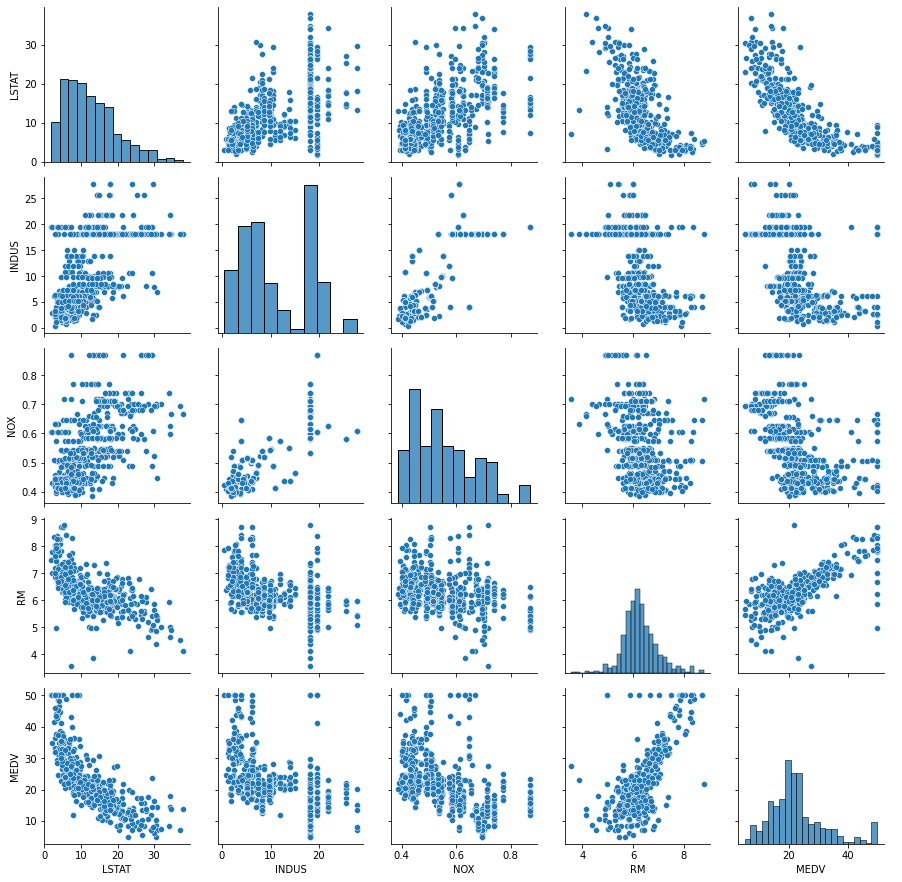

In [9]:
g = sns.PairGrid(df.loc[:, cols])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

- eyeball some observations:
    - diagonal charts are just histogram distribution of each feather on x-axix
    - there's a linear relationship between RM and MEDV, the hourse price
    - the MEDV feature seems to be normally distributed but contains several outliers

## Estimating the coefficient of a regression model
- use scikit learn's LinearRegression API

In [10]:
from sklearn.linear_model import LinearRegression

In [25]:
# let's just use no. of bedrooms as feature for the sake of simplicity
X = df[['RM']]

In [26]:
X

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [27]:
y = df['MEDV']

In [28]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [78]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [79]:
y_pred = lr.predict(X)

In [80]:
lr.coef_

array([9.10210898])

In [81]:
print(f'Slope, w0: {lr.coef_[0]:.3f}')

Slope, w0: 9.102


In [82]:
print(f'Intercept: {lr.intercept_:.3f}')

Intercept: -34.671


### plot the regression line
- the best fitting line on the dataset

[Text(0, 0.5, 'Price in \\$1000s [MEDV]'),
 Text(0.5, 0, 'Average number of rooms [RM]')]

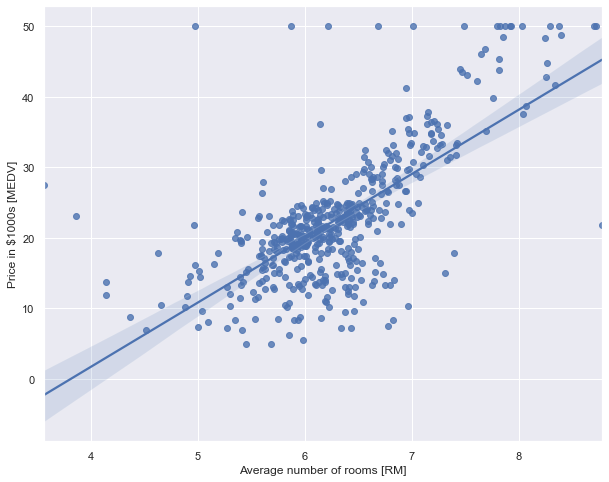

In [83]:
sns.set_theme(color_codes=True)
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.regplot(x="RM", y="MEDV", data=df)
ax.set(ylabel="Price in \$1000s [MEDV]", xlabel="Average number of rooms [RM]")

In [84]:
import locale # currency formatting
locale.setlocale( locale.LC_ALL, '' ) # set US locale

'en_US.UTF-8'

In [85]:
# let's predict the price for a 5 bedroom house
num_rooms = np.array([[5.0]])
price = lr.predict(num_rooms)
print(f'''Price of {num_rooms[0][0]:.0f} bedroom house is predicted as
          {locale.currency(price[0]*1000, grouping=True )}''')

Price of 5 bedroom house is predicted as
          $10,839.92


### Fitting a robust regression model using RANSAC
- Linear regression models can be heavily impacted by the presence of outliers
- outliers can be detected and removed; requires judgement as data scientist and the domain knowledge
- alternative to throwing outliers is using the RANSAC - RANdom SAmple Consensus algorithm
    - fits a regression model to a subset of the data (**inliers**)

- We can summarize the iterative RANSAC algorithm as follows:
    1. Select a random number of examples to be inliers and fit the model.
    2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
    3. Refit the model using all inliers.
    4. Estimate the error of the fitted model versus the inliers.
    5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations were reached; go back to step 1 otherwise.
    
- use RANSACRegression API of scikit-learn - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html

In [49]:
from sklearn.linear_model import RANSACRegressor

In [52]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)

In [53]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

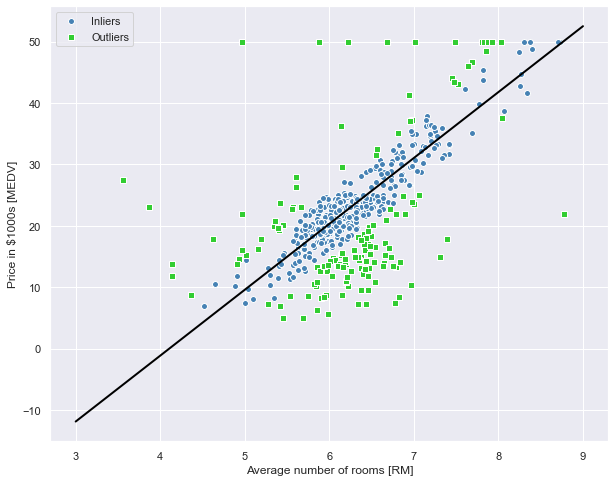

In [58]:
# let's obtain the inliers and outliers from the fitted ransac
# plot them with the linear fit
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers') 
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers') 
plt.plot(line_X, line_y_ransac, color='black', lw=2) 
plt.xlabel('Average number of rooms [RM]') 
plt.ylabel('Price in $1000s [MEDV]') 
plt.legend(loc='upper left')

In [60]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')
# we get a slightly different slope and intercept compared to straight linear regression

Slope: 10.735
Intercept: -44.089


In [77]:
# let's predict the price for a 5 bedroom house with ransac model
num_rooms = np.array([[5.0]])
price = ransac.predict(num_rooms)
print(f'''Price of {num_rooms[0][0]:.0f} bedroom house is predicted as
          {locale.currency(price[0]*1000, grouping=True )}''')

Price of 5 bedroom house is predicted as
          $9,583.48
